In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## 1. Exploratory Data Analysis (EDA)

In [2]:
group_data = pd.read_csv('IS453 Group Assignment - Data.csv')
group_data.head()

,STATUS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
group_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [4]:
df_filtered = group_data[group_data['OCCUPATION_TYPE'] == 'Drivers']
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18603 entries, 13 to 307494
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   STATUS                       18603 non-null  int64  
 1   NAME_CONTRACT_TYPE           18603 non-null  object 
 2   CODE_GENDER                  18603 non-null  object 
 3   FLAG_OWN_CAR                 18603 non-null  object 
 4   FLAG_OWN_REALTY              18603 non-null  object 
 5   CNT_CHILDREN                 18603 non-null  int64  
 6   AMT_INCOME_TOTAL             18603 non-null  float64
 7   AMT_CREDIT                   18603 non-null  float64
 8   AMT_ANNUITY                  18602 non-null  float64
 9   AMT_GOODS_PRICE              18590 non-null  float64
 10  NAME_TYPE_SUITE              18521 non-null  object 
 11  NAME_INCOME_TYPE             18603 non-null  object 
 12  NAME_EDUCATION_TYPE          18603 non-null  object 
 13  NAME_FAMILY_ST

In [5]:
# Filter all rows for which the occupation type = driver
df_filtered = group_data[group_data['OCCUPATION_TYPE'] == 'Drivers']
df_filtered.head(15)

# # Print the shape of the dataframe
# # print(df_filtered.shape)

,STATUS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
13,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
16,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
24,0,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,247500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
33,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
37,0,Cash loans,M,N,Y,0,121500.0,454500.0,15151.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
64,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
73,0,Cash loans,M,N,Y,1,157500.0,755190.0,28894.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
83,0,Revolving loans,M,Y,N,0,225000.0,270000.0,13500.0,270000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
131,0,Cash loans,M,Y,Y,0,202500.0,1107981.0,32526.0,967500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
132,0,Revolving loans,M,N,N,0,144000.0,180000.0,9000.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


## 2. Univariate Analysis



In [6]:
# review data counts and types
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18603 entries, 13 to 307494
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   STATUS                       18603 non-null  int64  
 1   NAME_CONTRACT_TYPE           18603 non-null  object 
 2   CODE_GENDER                  18603 non-null  object 
 3   FLAG_OWN_CAR                 18603 non-null  object 
 4   FLAG_OWN_REALTY              18603 non-null  object 
 5   CNT_CHILDREN                 18603 non-null  int64  
 6   AMT_INCOME_TOTAL             18603 non-null  float64
 7   AMT_CREDIT                   18603 non-null  float64
 8   AMT_ANNUITY                  18602 non-null  float64
 9   AMT_GOODS_PRICE              18590 non-null  float64
 10  NAME_TYPE_SUITE              18521 non-null  object 
 11  NAME_INCOME_TYPE             18603 non-null  object 
 12  NAME_EDUCATION_TYPE          18603 non-null  object 
 13  NAME_FAMILY_ST

In [7]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

In [8]:
pd.options.display.max_columns = None


In [9]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [10]:
columns_infoDF = show_missing(df_filtered)

In [11]:
columns_infoDF[columns_infoDF['pc_missing'] > 0].sort_values(by='missing', ascending=False)

,variable,dtype,count,unique,missing,pc_missing
40,EXT_SOURCE_1,float64,18603,6768,11768,63.26
43,APARTMENTS_AVG,float64,18603,946,10475,56.31
20,OWN_CAR_AGE,float64,18603,53,5803,31.19
42,EXT_SOURCE_3,float64,18603,688,3944,21.20
74,AMT_REQ_CREDIT_BUREAU_YEAR,float64,18603,16,2628,14.13
69,AMT_REQ_CREDIT_BUREAU_HOUR,float64,18603,5,2628,14.13
73,AMT_REQ_CREDIT_BUREAU_QRT,float64,18603,7,2628,14.13
72,AMT_REQ_CREDIT_BUREAU_MON,float64,18603,20,2628,14.13
71,AMT_REQ_CREDIT_BUREAU_WEEK,float64,18603,8,2628,14.13
70,AMT_REQ_CREDIT_BUREAU_DAY,float64,18603,8,2628,14.13


In [12]:
# df_filtered.describe(include = 'all')
df_filtered.describe()

,STATUS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,18603.000000,18603.000000,1.860300e+04,1.860300e+04,18602.000000,1.859000e+04,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,12800.000000,18603.0,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,6835.000000,18575.000000,14659.000000,8128.000000,18567.000000,18567.000000,18567.000000,18567.000000,18603.000000,18603.0,18603.000000,18603.0,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.0,18603.000000,18603.0,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,18603.000000,15975.000000,15975.000000,15975.000000,15975.000000,15975.000000,15975.000000
mean,0.113261,0.511853,1.870116e+05,6.123340e+05,29071.181970,5.478113e+05,0.020876,-15103.108531,-1939.034618,-4627.179433,-2889.026716,12.272344,1.0,0.999892,0.231576,0.998495,0.261409,0.047896,2.339193,2.041982,2.020481,12.061388,0.017900,0.077944,0.065366,0.099339,0.344837,0.282589,0.392040,0.513314,0.505681,0.116793,1.483546,0.140464,1.467335,0.096138,-981.857389,0.0,0.643445,0.0,0.013922,0.003494,0.000108,0.263076,0.001559,0.0,0.001451,0.0,0.007526,0.002043,0.001935,0.012310,0.000215,0.008493,0.000699,0.000645,0.000591,0.006948,0.008138,0.030610,0.274429,0.259155,1.900720
std,0.316920,0.771570,8.259338e+04,3.859217e+05,13704.956551,3.522446e+05,0.013810,3530.974095,1855.913162,3162.399055,1495.182853,10.178724,0.0,0.010368,0.421851,0.038768,0.439414,0.213551,0.916457,0.503840,0.499500,3.261824,0.132593,0.268091,0.247177,0.299124,0.475328,0.450270,0.194184,0.189635,0.199515,0.110390,2.354122,0.430302,2.334699,0.344654,848.419901,0.0,0.478995,0.0,0.117172,0.059009,0.010368,0.440315,0.039453,0.0,0.038070,0.0,0.086426,0.045151,0.043949,0.110268,0.014662,0.091769,0.026427,0.025390,0.024310,0.091668,0.138166,0.203579,0.933527,0.597200,1.828446
min,0.000000,0.000000,2.700000e+04,4.500000e+04,2929.500000,4.500000e+04,0.000533,-24977.000000,-15147.000000,-16442.000000,-6263.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021693,0.000005,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,-4046.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.350000e+05,2.913840e+05,19215.000000,2.655000e+05,0.010006,-17835.000000,-2618.500000,-6915.500000,-4222.000000,6.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2357

In [13]:
# group_data.hist(figsize=(20,20))
# plt.tight_layout()
# #AMT_CREDIT, AMT_ANNUITY, AMT_GOODS,PRICE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAY_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, CNT_FAM_MEMBERS
# #HOUR_APPR_PROCESS_START, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 , APARTMENTS_AVG, DAYS_LAST_PHONE_CHANGE , AMT_REQ_CREDIT_BUREAU_YEAR

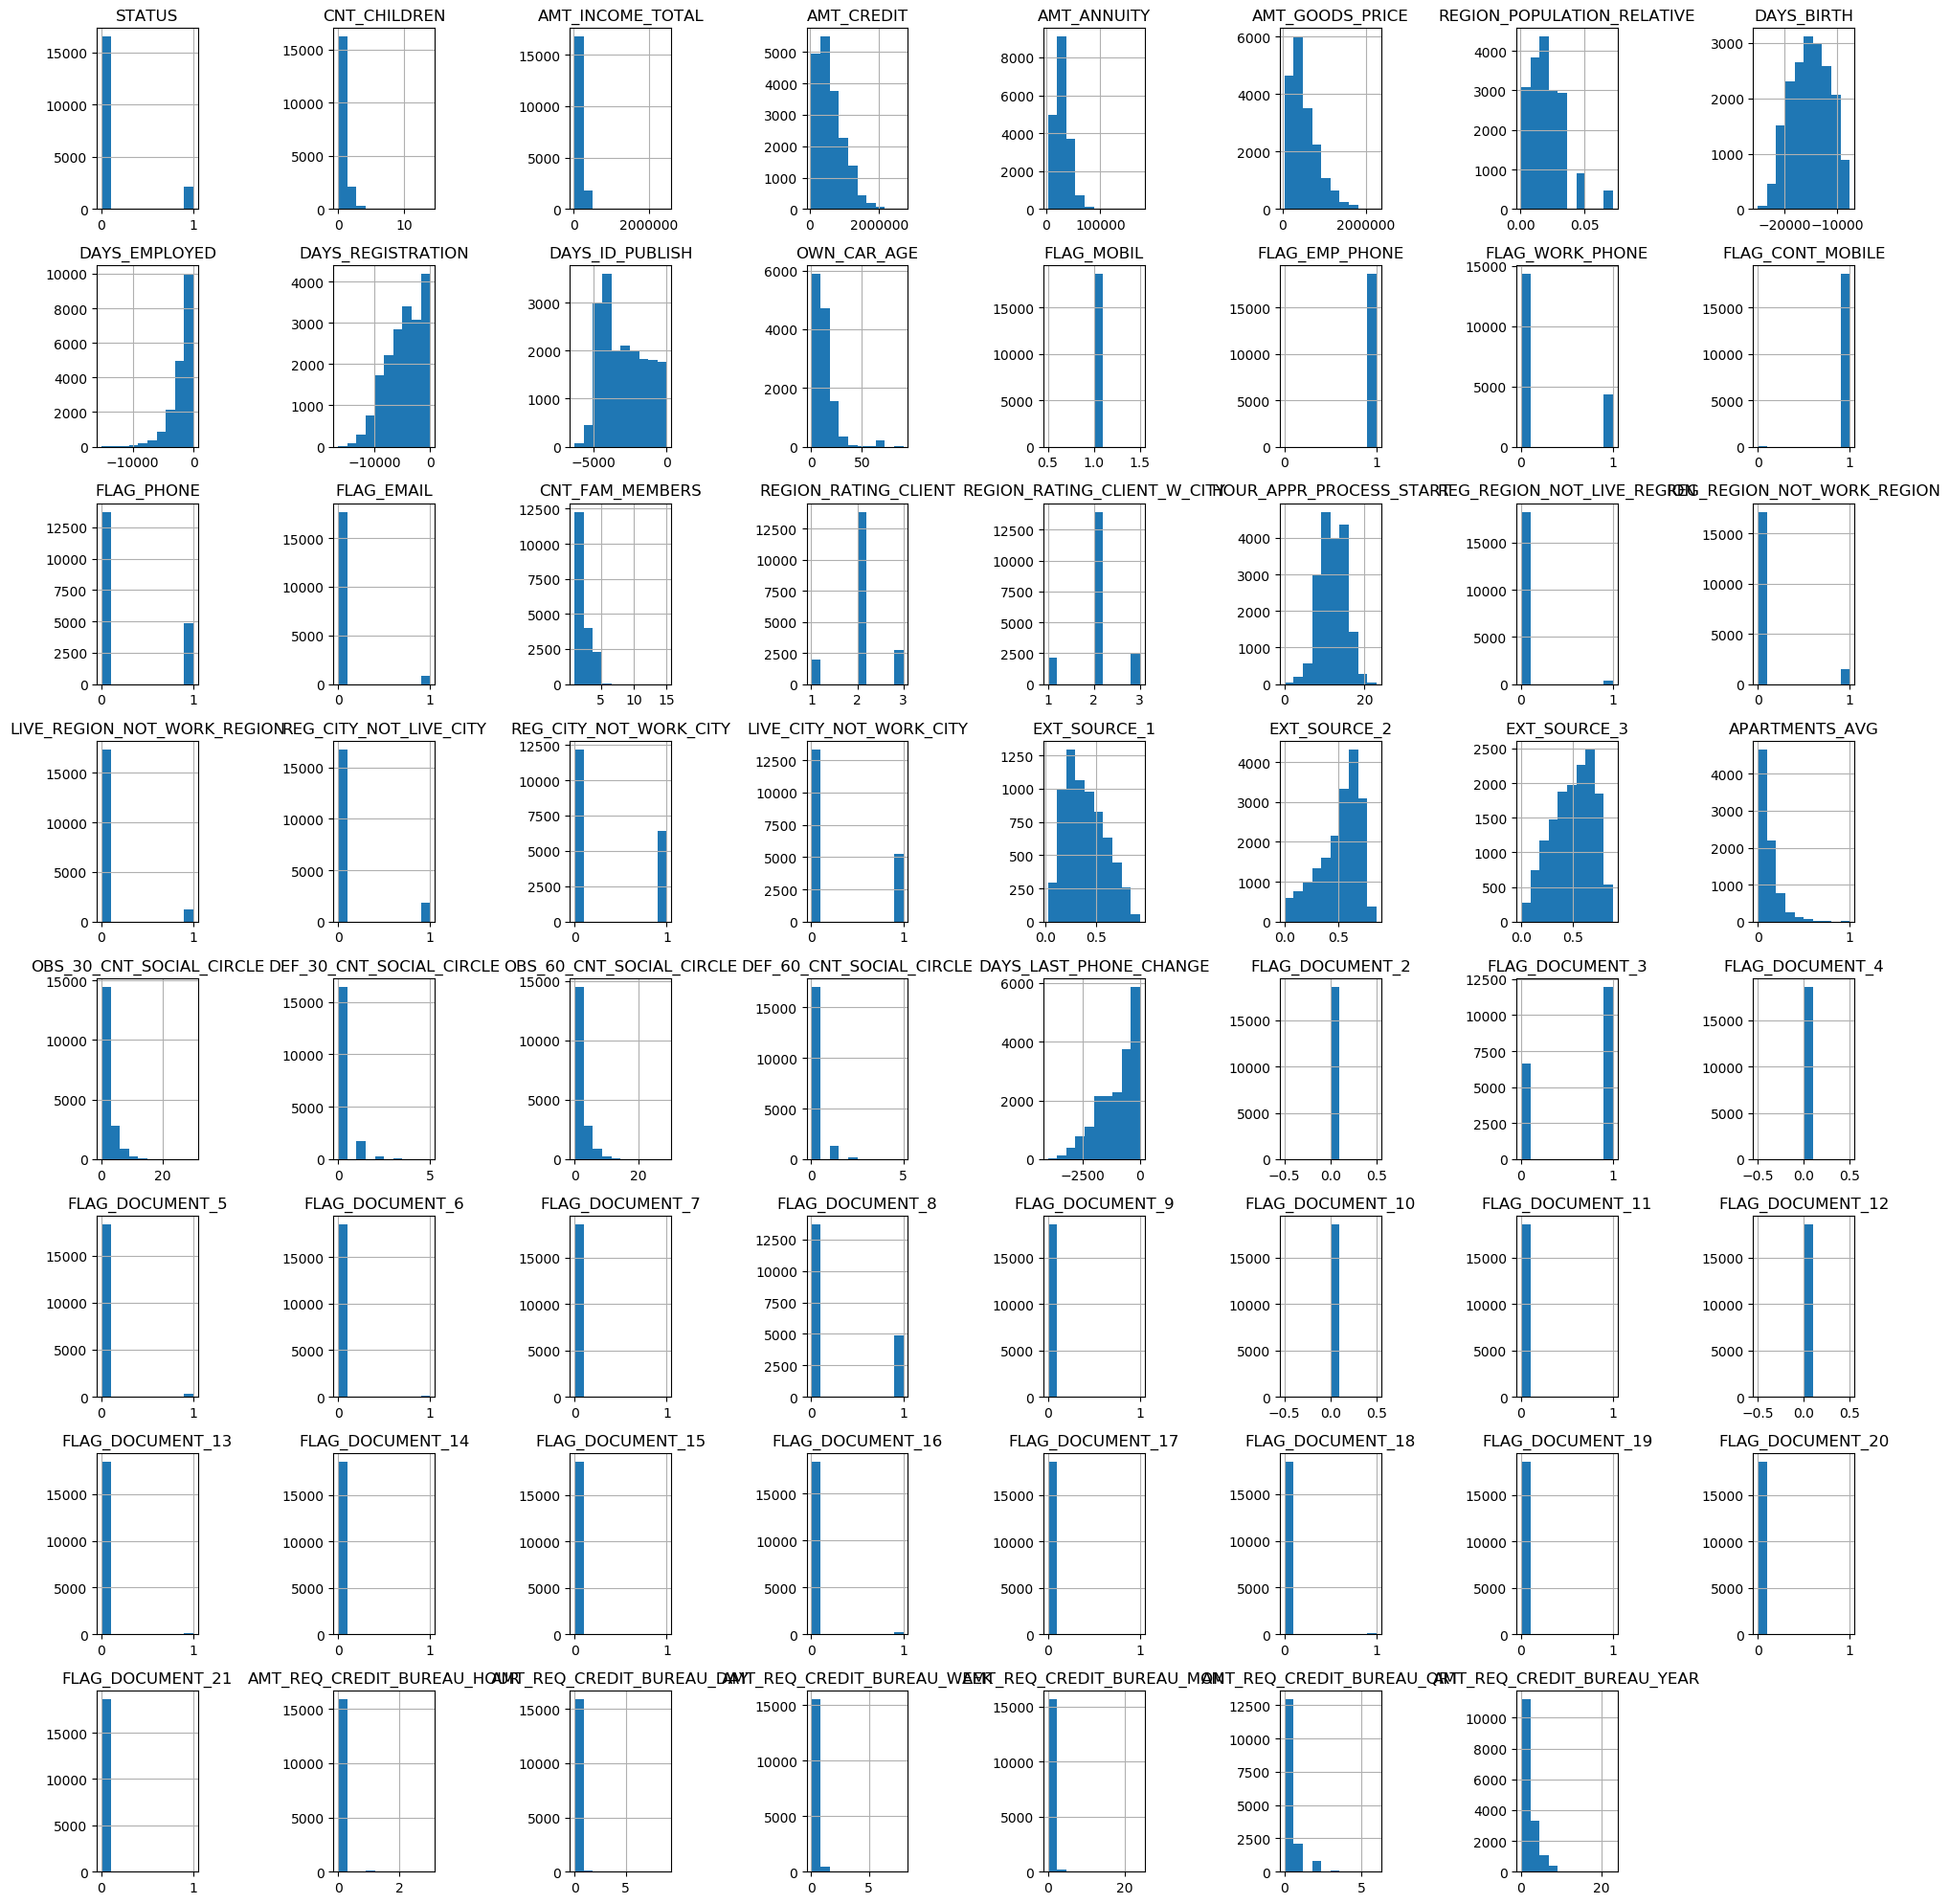

In [14]:
df_filtered.hist(figsize=(20,20))
plt.tight_layout()
#AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, CNT_FAM_MEMBERS,
#HOUR_APPR_PROCESS_START, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 , APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE , AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR


In [15]:
selected_columns = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3' , 'APARTMENTS_AVG', 'DAYS_LAST_PHONE_CHANGE' , 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
selected_columns_len = len(selected_columns)
selected_columns_len

18

In [16]:
# # sample code
# rows_w_gt_3_na = group_data[group_data.isnull().sum(axis=1) > 3].shape[0]
# print('Percent of total rows missing more than 3 values: ' + str("{:.1%}".format(rows_w_gt_3_na/group_data.shape[0])))

In [17]:
#sample code
col_w_na = pd.DataFrame((df_filtered.isnull().sum().sort_values(ascending=False)/df_filtered.shape[0])).applymap("{0:.0%}".format)

print(col_w_na[0])

EXT_SOURCE_1                   63%
APARTMENTS_AVG                 56%
OWN_CAR_AGE                    31%
EXT_SOURCE_3                   21%
AMT_REQ_CREDIT_BUREAU_YEAR     14%
AMT_REQ_CREDIT_BUREAU_QRT      14%
AMT_REQ_CREDIT_BUREAU_MON      14%
AMT_REQ_CREDIT_BUREAU_WEEK     14%
AMT_REQ_CREDIT_BUREAU_DAY      14%
AMT_REQ_CREDIT_BUREAU_HOUR     14%
NAME_TYPE_SUITE                 0%
OBS_30_CNT_SOCIAL_CIRCLE        0%
DEF_30_CNT_SOCIAL_CIRCLE        0%
OBS_60_CNT_SOCIAL_CIRCLE        0%
DEF_60_CNT_SOCIAL_CIRCLE        0%
EXT_SOURCE_2                    0%
AMT_GOODS_PRICE                 0%
AMT_ANNUITY                     0%
FLAG_DOCUMENT_15                0%
FLAG_DOCUMENT_4                 0%
FLAG_DOCUMENT_21                0%
FLAG_DOCUMENT_20                0%
FLAG_DOCUMENT_19                0%
FLAG_DOCUMENT_18                0%
DAYS_LAST_PHONE_CHANGE          0%
FLAG_DOCUMENT_2                 0%
FLAG_DOCUMENT_3                 0%
FLAG_DOCUMENT_5                 0%
FLAG_DOCUMENT_14    

In [18]:
# remove values with pc_change > 5%
# EXT_SOURCE_1                   63%
# APARTMENTS_AVG                 56%
# OWN_CAR_AGE                    31%
# EXT_SOURCE_3                   21%
# AMT_REQ_CREDIT_BUREAU_YEAR     14%
# AMT_REQ_CREDIT_BUREAU_QRT      14%
# AMT_REQ_CREDIT_BUREAU_MON      14%
# AMT_REQ_CREDIT_BUREAU_WEEK     14%
# AMT_REQ_CREDIT_BUREAU_DAY      14%
# AMT_REQ_CREDIT_BUREAU_HOUR     14%

col_more_than_5_percent_missing_value = ['EXT_SOURCE_1', 'APARTMENTS_AVG', 'OWN_CAR_AGE','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR'] 

In [19]:
new_col = []
for col in selected_columns:
    if col not in col_more_than_5_percent_missing_value:
        new_col.append(col)

In [20]:
# new_col_wStatus = new_col + ['STATUS']

In [21]:
#group_data
# selected_columns = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
# 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3' , 'APARTMENTS_AVG', 'DAYS_LAST_PHONE_CHANGE' , 'AMT_REQ_CREDIT_BUREAU_YEAR']
# selected_columns_len = len(selected_columns)
# selected_columns_len

In [22]:
#selected_columns = before dropping missing values
# selected_columns = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
# 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3' , 'APARTMENTS_AVG', 'DAYS_LAST_PHONE_CHANGE' , 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
# selected_columns_len = len(selected_columns)
# selected_columns_len

In [23]:
selected_columns1 = ['AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE']
selected_columns_len = len(selected_columns1)
selected_columns_len

12

In [24]:
# # review summary statistics
# df_filtered.describe()

In [25]:
# # create boxplots

# columns_to_plot = selected_columns
# row_count=int(np.ceil(len(columns_to_plot)/2))

# # Create the figure and two subplots
# fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

# for i, axis in enumerate(fig.axes):
#     sns.boxplot(ax=axis, data=df_filtered[columns_to_plot[i]],orient='h')
#     axis.set_xlabel(str(columns_to_plot[i]))
#     if i == len(columns_to_plot)-1: 
#          break
    
# # Show the plot
# plt.show()


In [26]:
# group_data

In [27]:
# df_filtered

In [28]:
# df.drop(columns=['A', 'B'])
df_filtered1 = df_filtered[new_col]
df_filtered1

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE
13,918468.0,28966.5,697500.0,0.016612,-14086,-3028,-643.0,-4911,3.0,13,0.566907,-4.0
16,509602.5,26149.5,387000.0,0.018634,-12931,-1317,-6392.0,-3866,2.0,12,0.236378,-3.0
24,247500.0,12703.5,247500.0,0.026392,-11286,-746,-108.0,-3729,4.0,14,0.786179,-4.0
33,733315.5,39069.0,679500.0,0.015221,-11694,-2060,-3557.0,-3557,3.0,10,0.321745,-697.0
37,454500.0,15151.5,454500.0,0.030755,-21077,-1288,-5474.0,-4270,2.0,10,0.719799,-1541.0
...,...,...,...,...,...,...,...,...,...,...,...,...
307425,450000.0,22500.0,450000.0,0.022800,-11943,-3214,-5994.0,-3520,4.0,13,0.414246,-1911.0
307432,840951.0,42934.5,679500.0,0.009175,-18146,-379,-10348.0,-1691,2.0,9,0.655284,-124.0
307446,900000.0,40671.0,900000.0,0.010006,-10130,-1290,-1862.0,-2772,1.0,14,0.348737,-243.0
307491,1078200.0,31522.5,900000.0,0.019101,-10976,-1953,-5048.0,-3369,4.0,10,0.561158,-1357.0


In [29]:
# df_filtered1.reset_index().drop(columns='index')

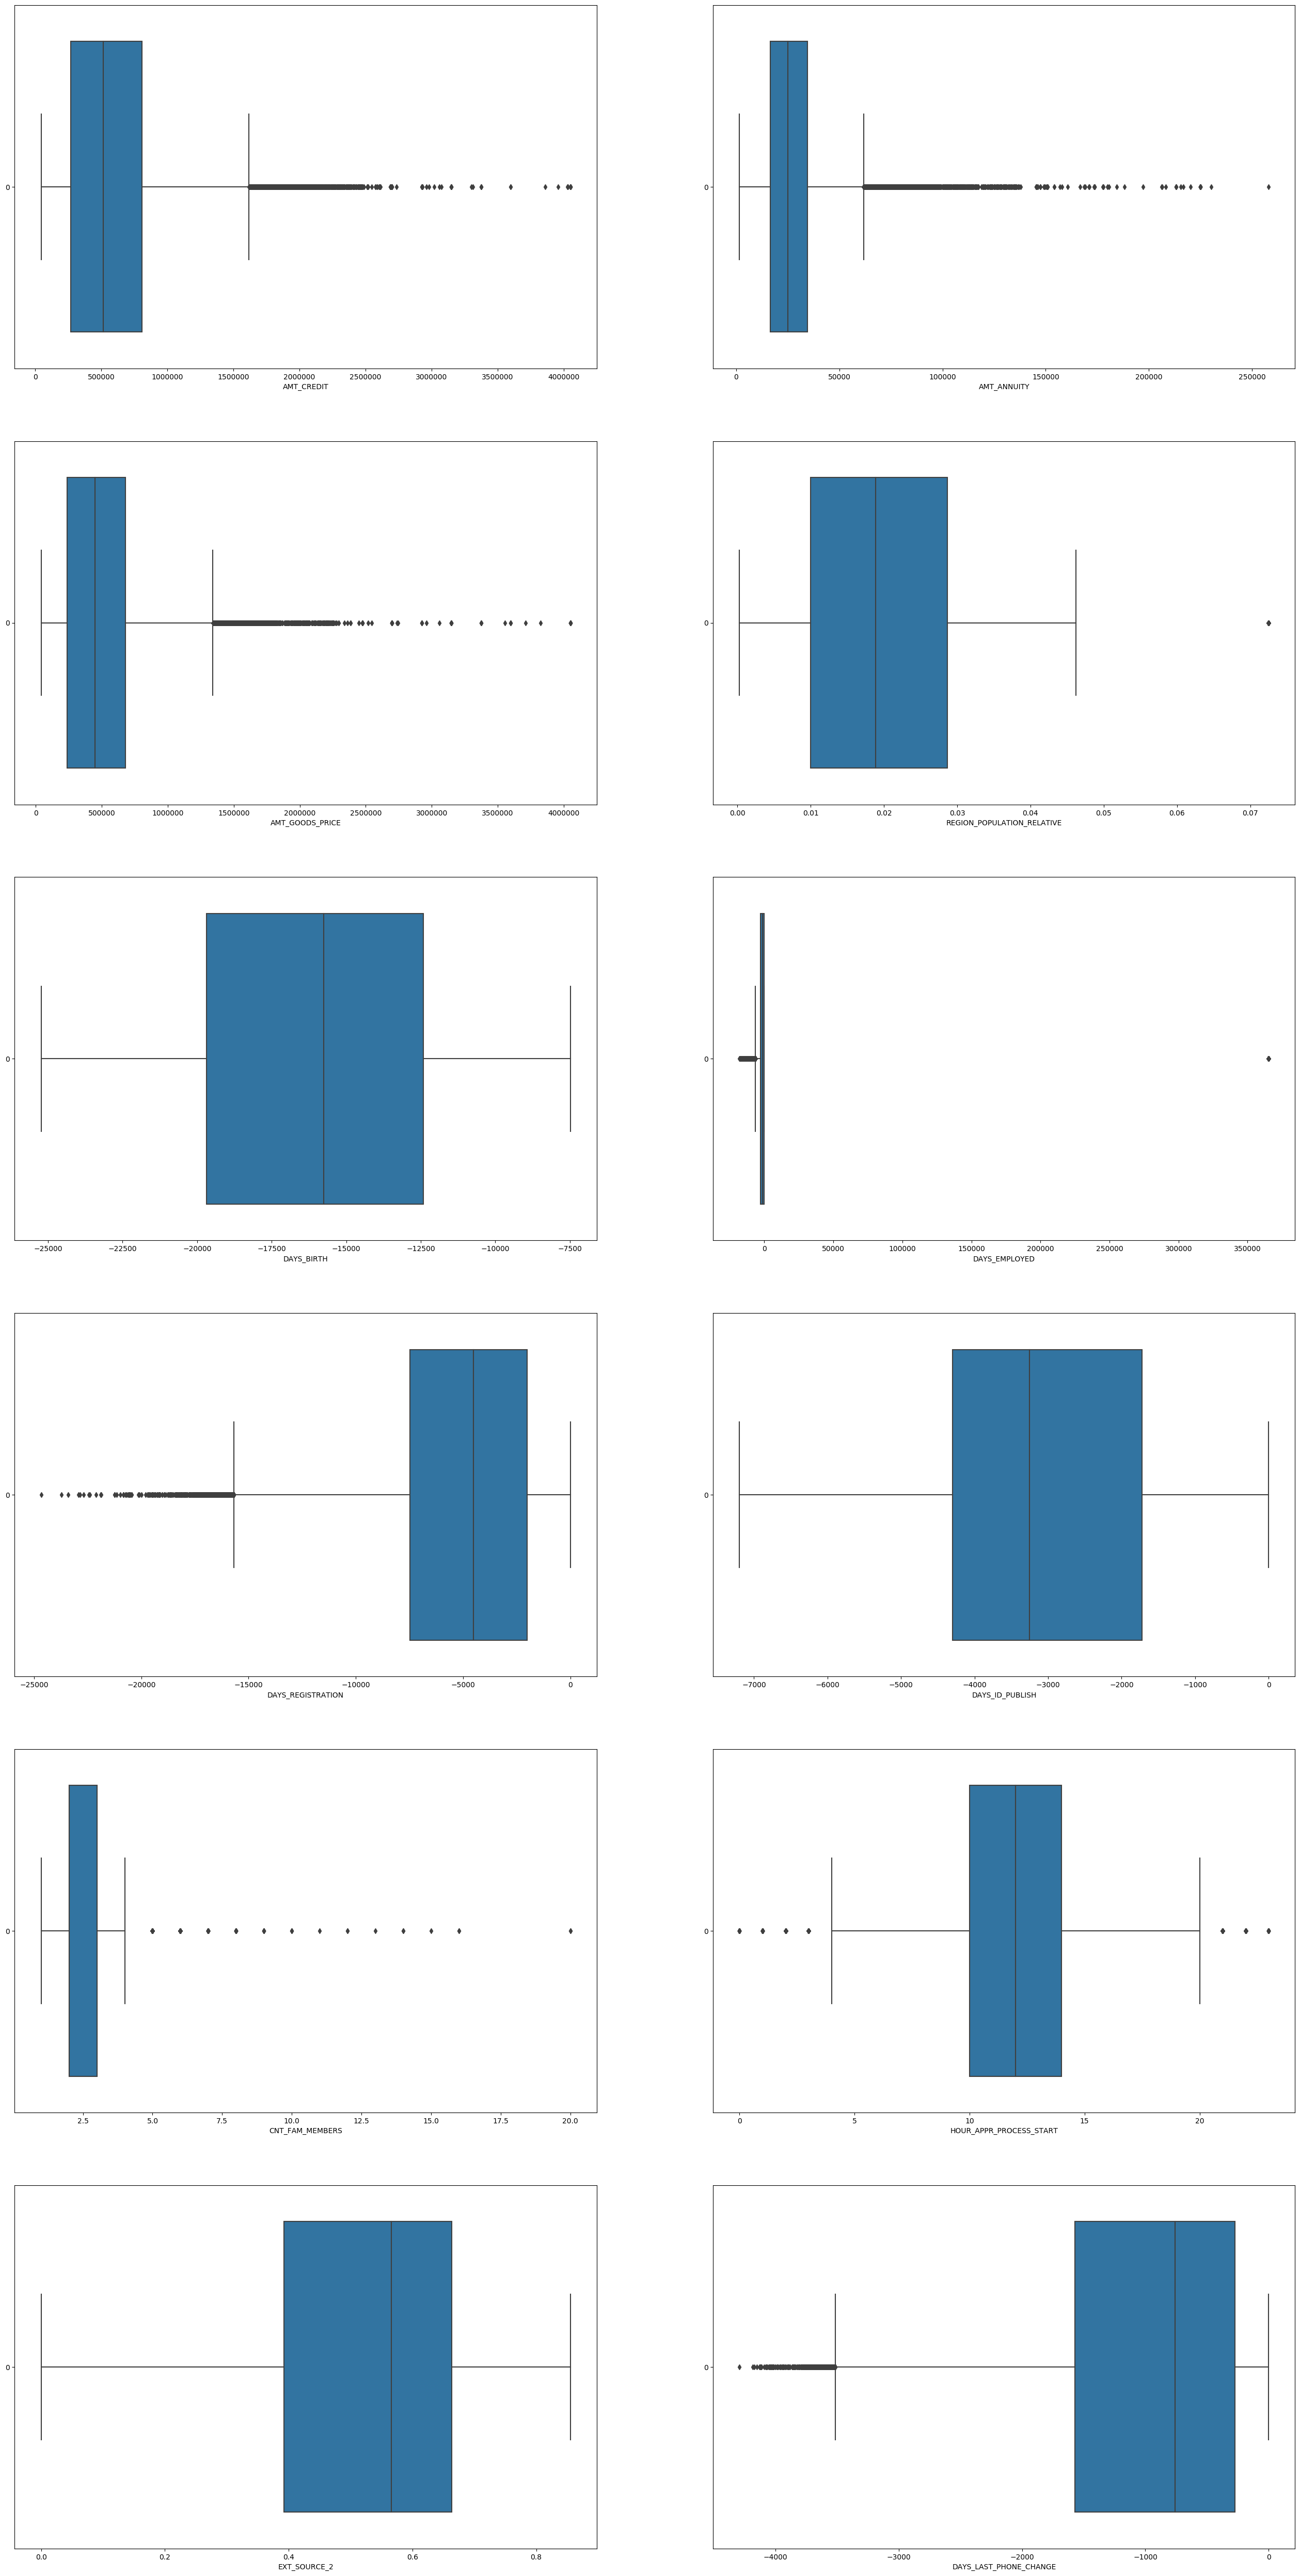

In [30]:
# create boxplots

columns_to_plot = new_col
row_count=int(np.ceil(len(columns_to_plot)/2))

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

for i, axis in enumerate(fig.axes):
    sns.boxplot(ax=axis, data=group_data[columns_to_plot[i]],orient='h')
    axis.set_xlabel(str(columns_to_plot[i]))
    if i == len(columns_to_plot)-1: 
         break
    
# Show the plot
plt.show()


In [31]:
# # create boxplots

# columns_to_plot = new_col
# row_count=int(np.ceil(len(columns_to_plot)/2))

# # Create the figure and two subplots
# fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

# for i, axis in enumerate(fig.axes):
#     sns.boxplot(ax=axis, data=df_filtered1[columns_to_plot[i]],orient='h')
#     axis.set_xlabel(str(columns_to_plot[i]))
#     if i == len(columns_to_plot)-1: 
#          break
    
# # Show the plot
# plt.show()


## Bar Charts Categorical Variables

In [32]:
cols = group_data.columns
num_cols = group_data._get_numeric_data().columns
num_cols

Index(['STATUS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCU

In [33]:
#list of categorical data
list(set(cols) - set(num_cols))

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'NAME_EDUCATION_TYPE',
 'ORGANIZATION_TYPE',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_HOUSING_TYPE']

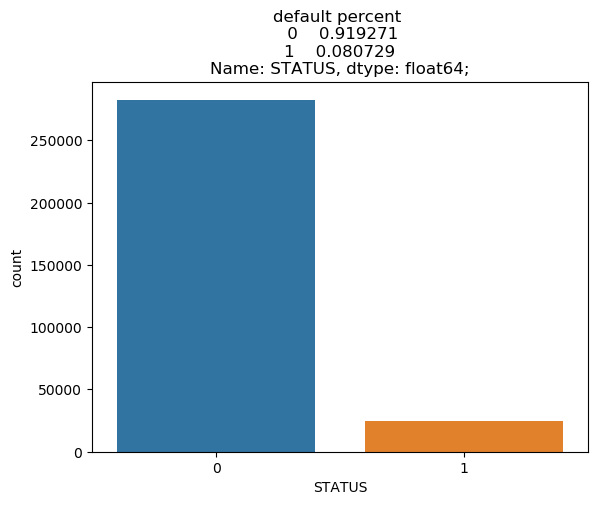

In [34]:
# percent of bads/default
sns.countplot(x = group_data['STATUS'])
normalise_count = group_data['STATUS'].value_counts(normalize = True)

# we are using the output of value_counts() normalised as the chart title
ax = plt.title('default percent \n {};'.format(normalise_count))

## Bivariate analysis


In [35]:
#selected_columns = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3' , 'APARTMENTS_AVG','OBS_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE' , 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
#new col 

# #sample
# plt.figure(figsize=(9,5))
# sns.kdeplot(data=df_filtered, x='AMT_CREDIT', hue="STATUS", fill = True)
# plt.title('Distribution of Loan amount by Default Rate')

Figure(900x500)
AxesSubplot(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'DistributionAMT_CREDITby Default Rate')

Figure(900x500)
AxesSubplot(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'DistributionAMT_ANNUITYby Default Rate')

Figure(900x500)
AxesSubplot(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'DistributionAMT_GOODS_PRICEby Default Rate')

Figure(900x500)
AxesSubplot(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'DistributionREGION_POPULATION_RELATIVEby Default Rate')

Figure(900x500)
AxesSubplot(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'DistributionDAYS_BIRTHby Default Rate')

Figure(900x500)
AxesSubplot(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'DistributionDAYS_EMPLOYEDby Default Rate')

Figure(900x500)
AxesSubplot(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'DistributionDAYS_REGISTRATIONby Default Rate')

Figure(900x500)
AxesSubplot(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'DistributionDAYS_ID_PUBLISHby Default Rate')

Figure(900x500)
AxesSubplot(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'DistributionCNT_FAM_MEMBERSby De

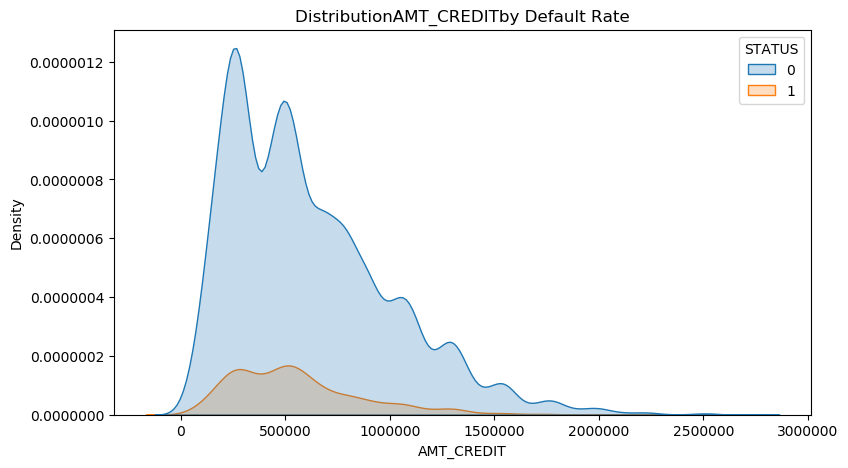

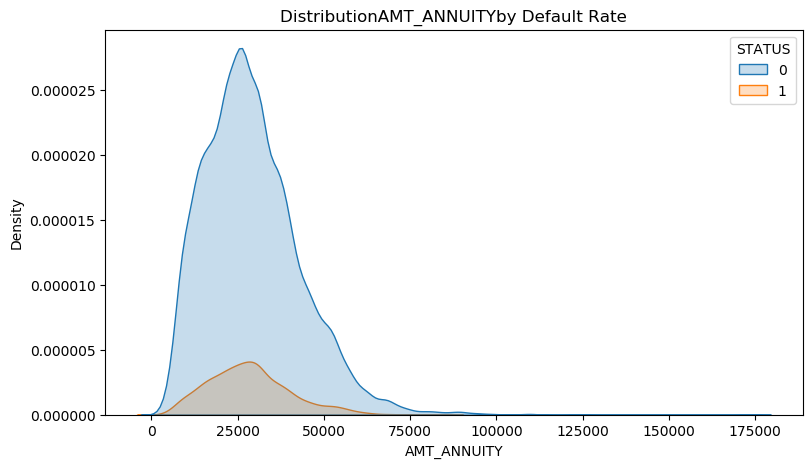

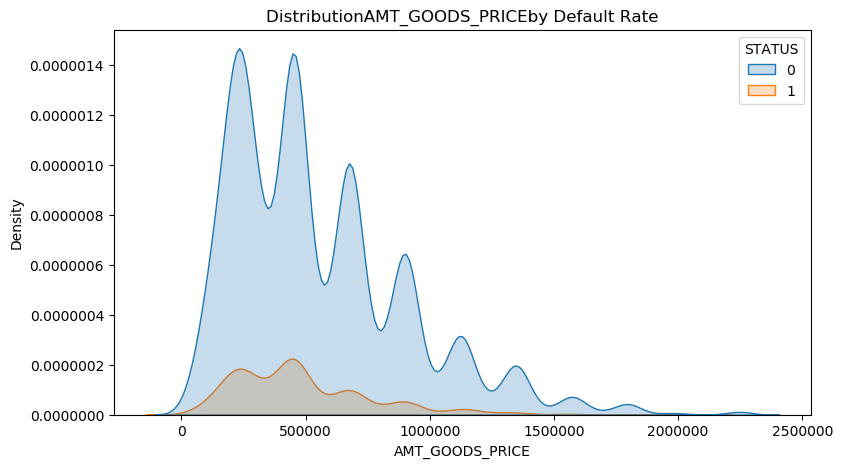

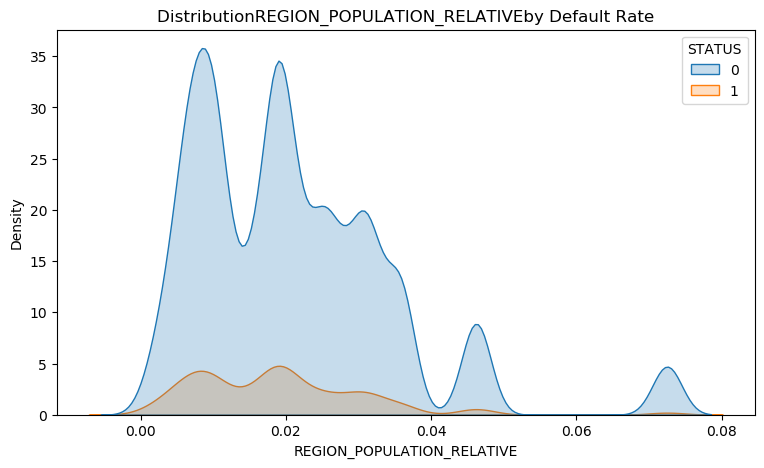

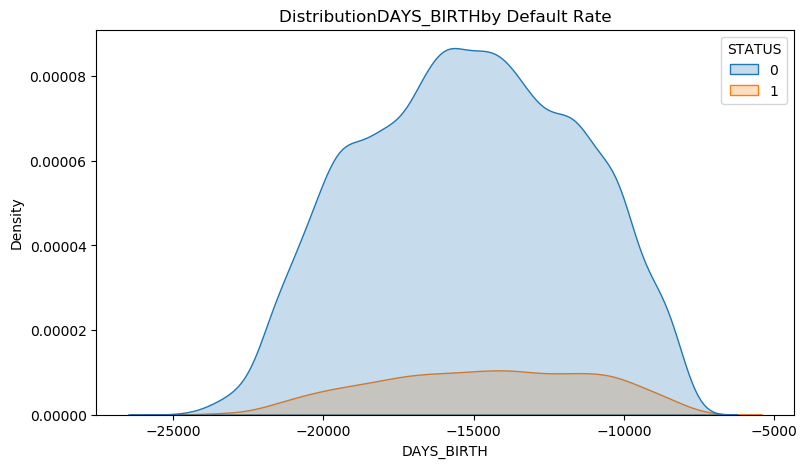

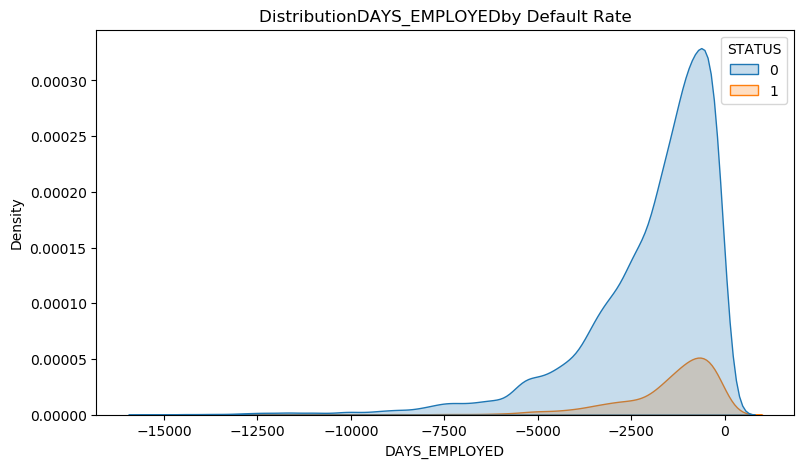

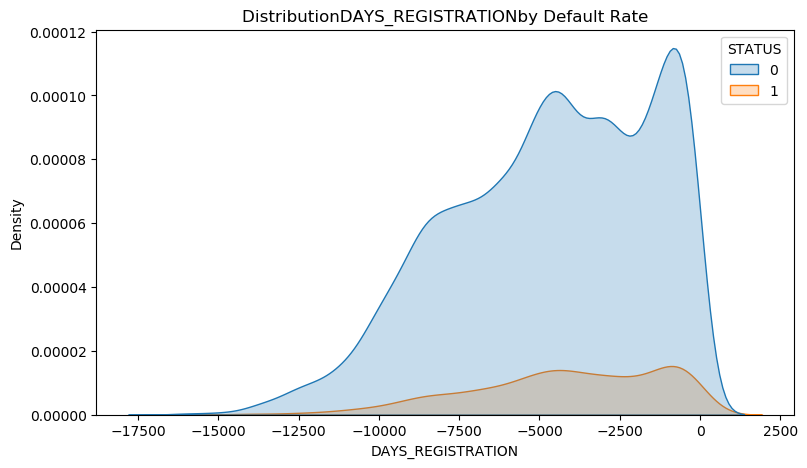

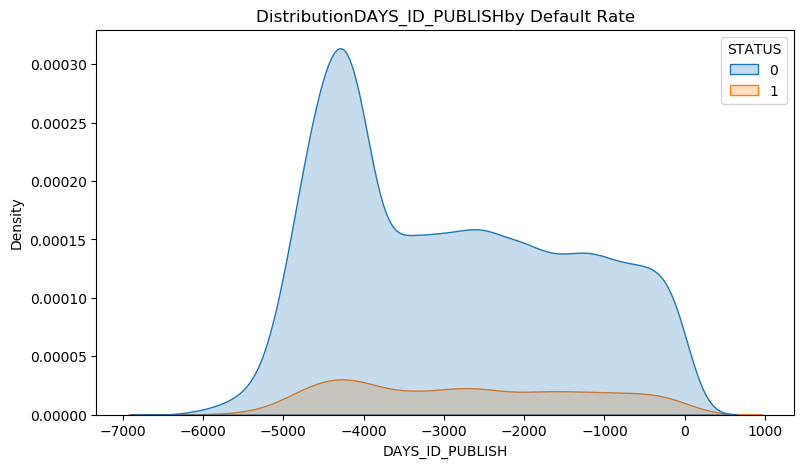

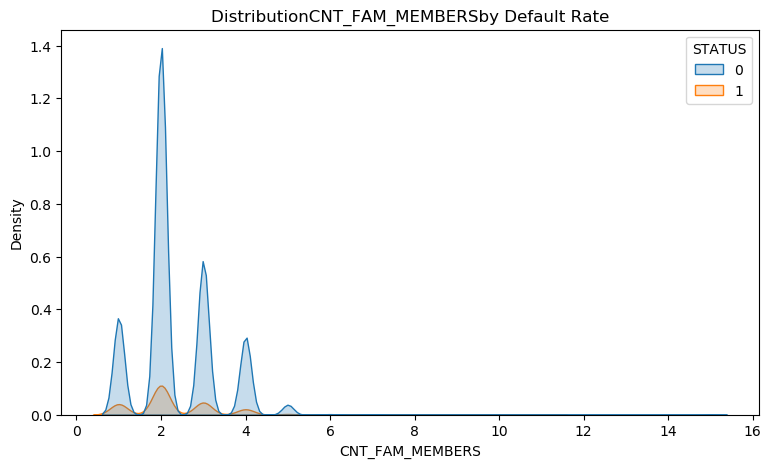

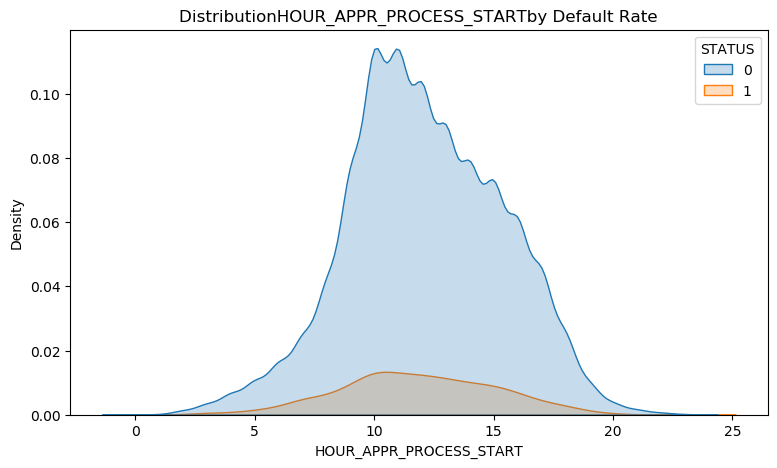

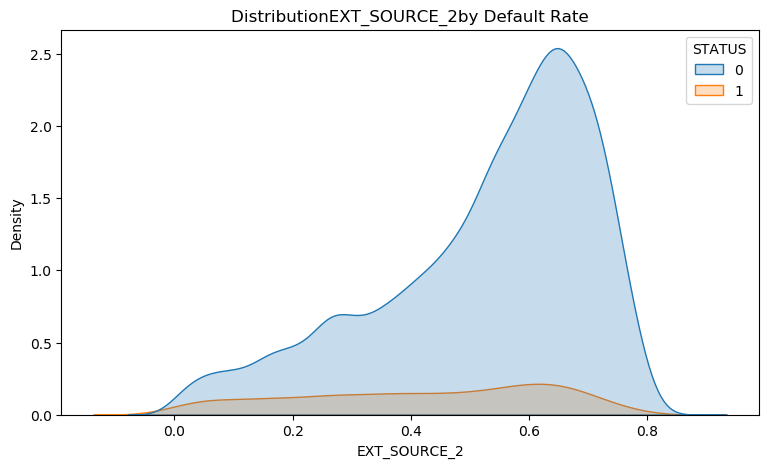

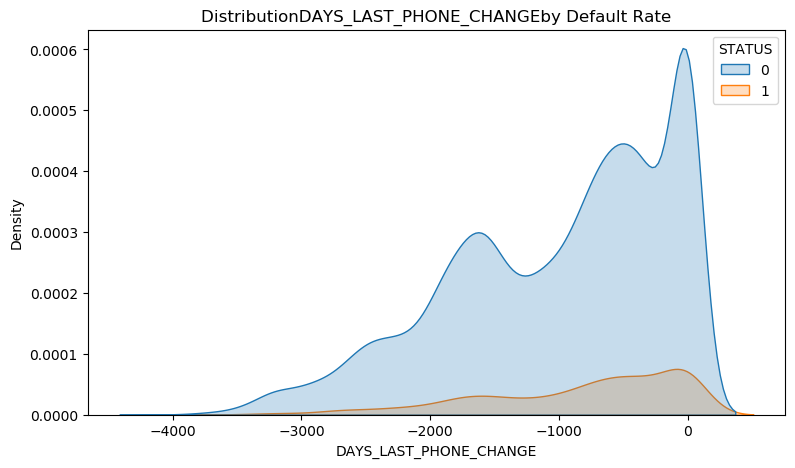

In [36]:
for i in new_col:
    print(plt.figure(figsize=(9,5)))
    print(sns.kdeplot(data=df_filtered, x=i, hue="STATUS", fill = True))
    print(plt.title('Distribution' + i + 'by Default Rate'))
    print()


## Analyse correlation of continuous variables using heat map


In [37]:
new_col

['AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE']

In [38]:
len(new_col)

12

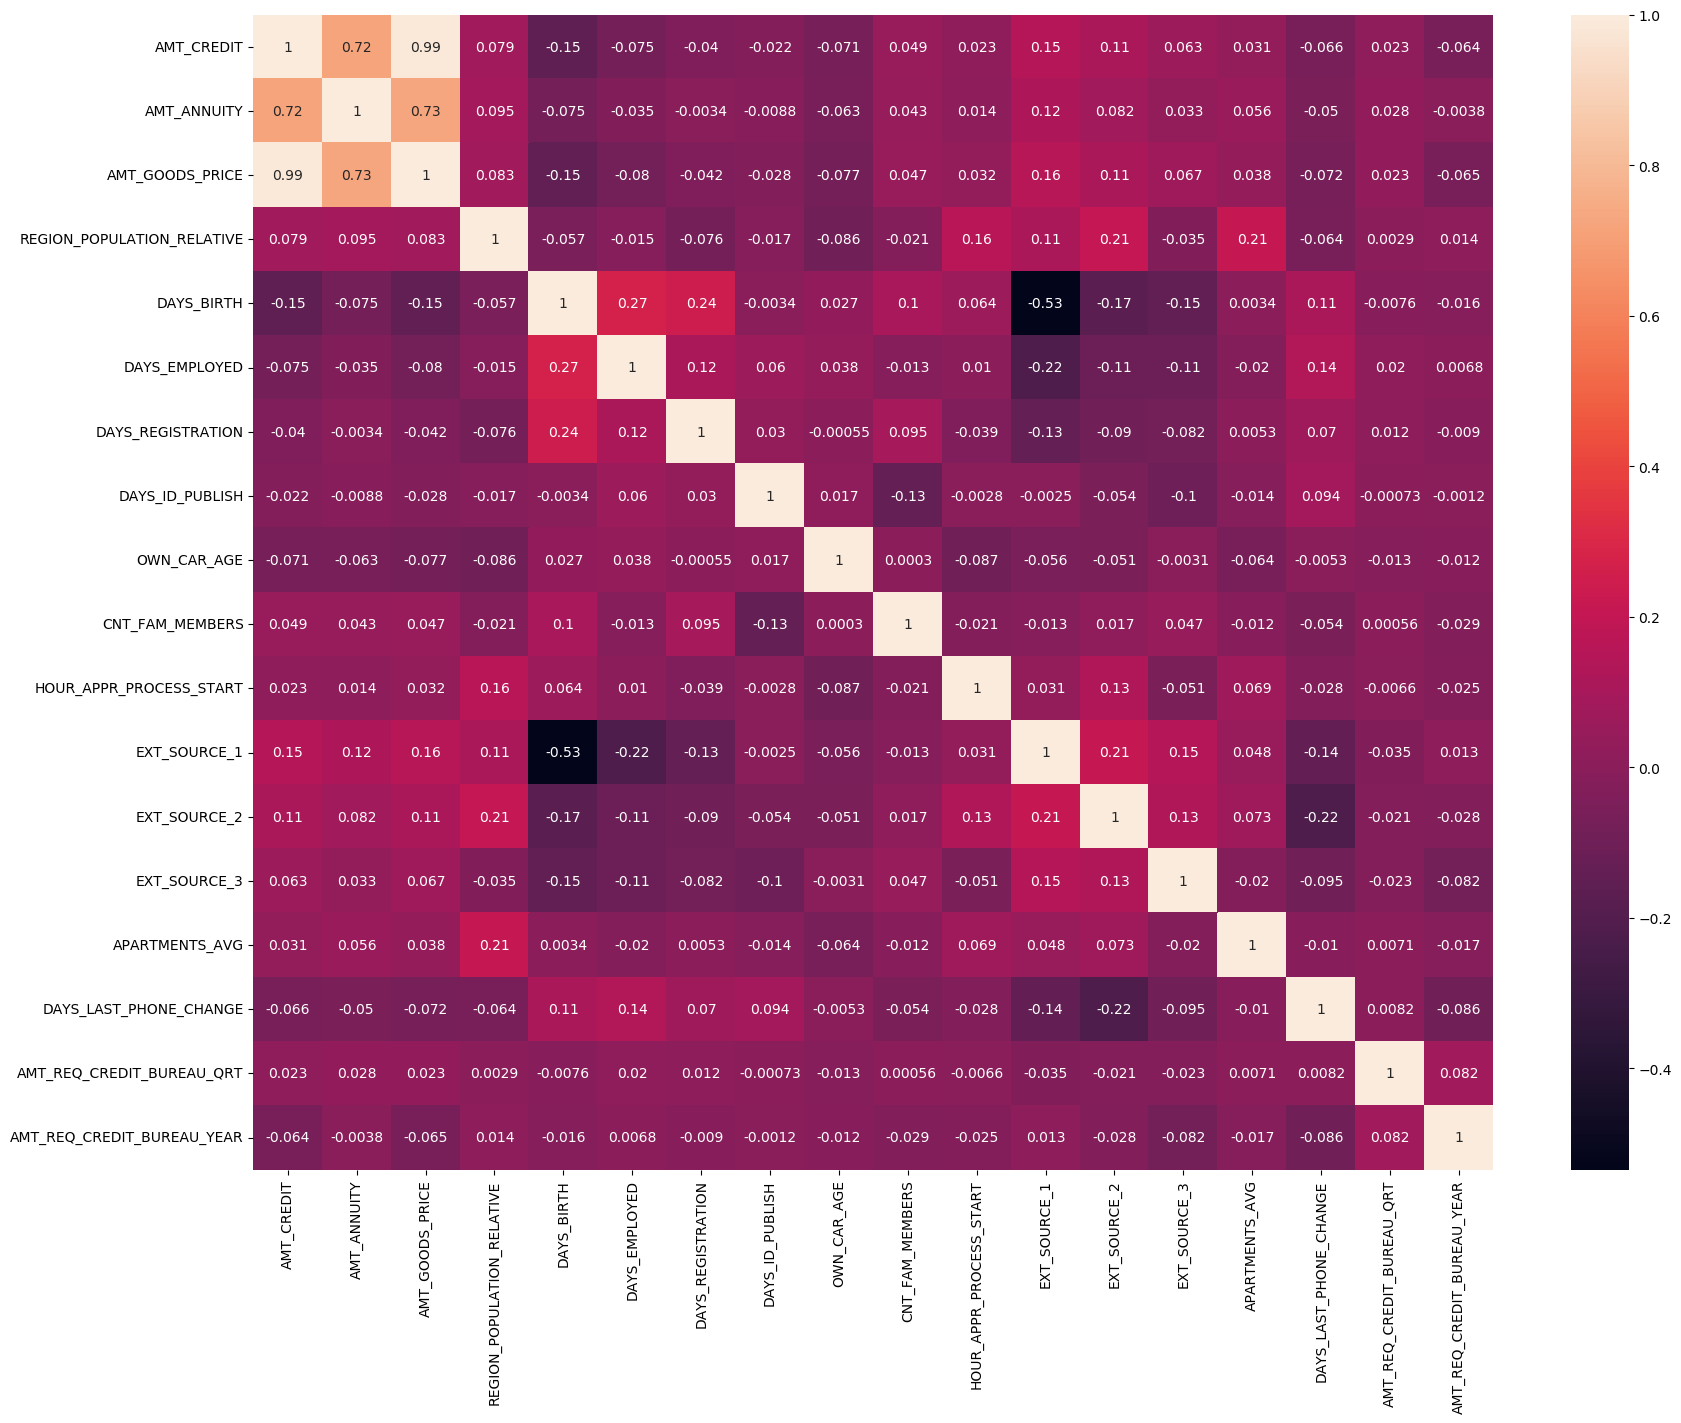

In [39]:
#18 variables
# plt.subplots(figsize=(20,15))
# sns.heatmap(corr)

continuous_df = df_filtered[selected_columns]
corr_df = continuous_df.corr()

plt.subplots(figsize=(20,15))
sns.heatmap(corr_df, annot=True)
# 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

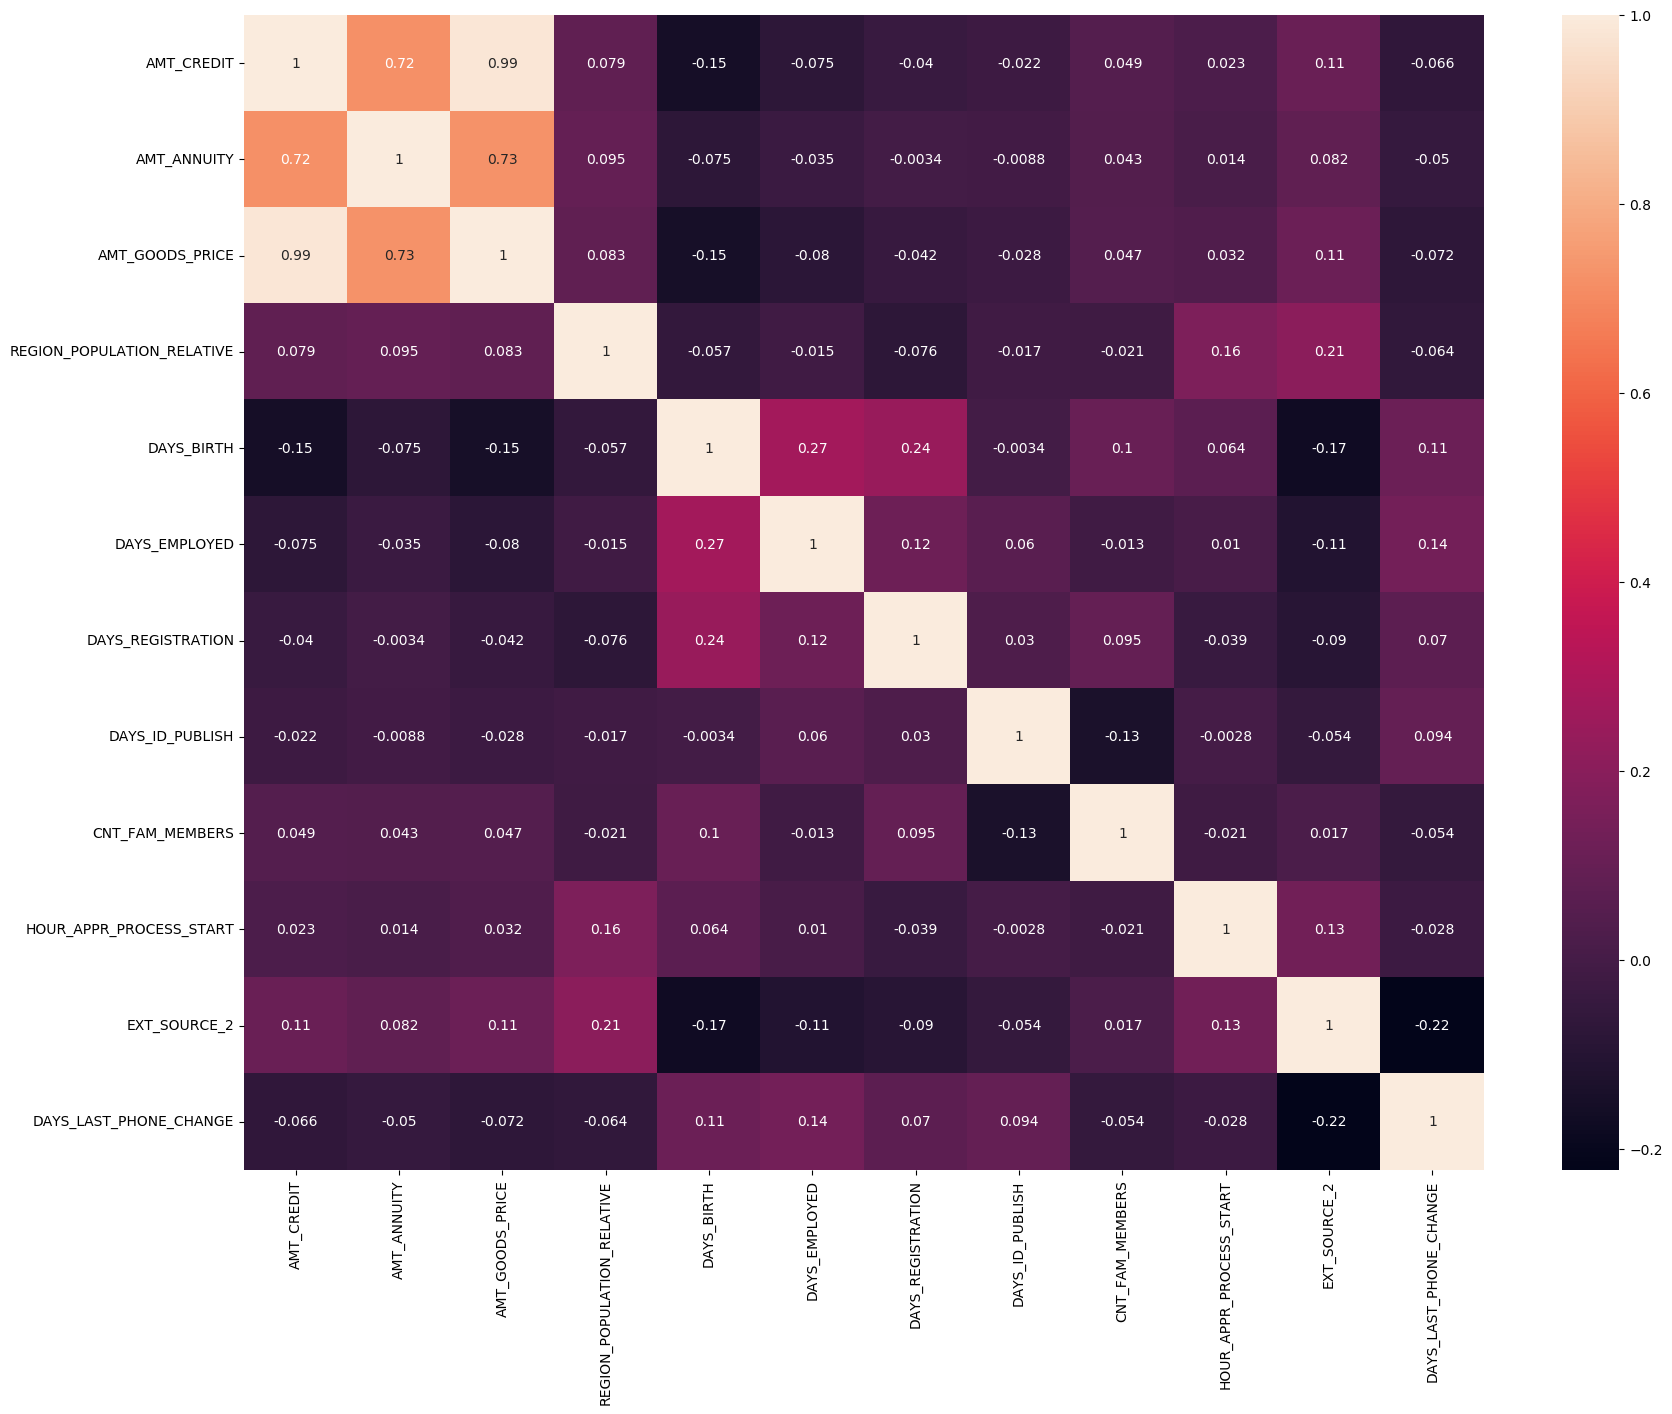

In [40]:
#12 variables (removing more than 5% missing values)
# plt.subplots(figsize=(20,15))
# sns.heatmap(corr)

continuous_df = df_filtered1[new_col]
corr_df = continuous_df.corr()

plt.subplots(figsize=(20,15))
sns.heatmap(corr_df, annot=True)

In [41]:
# sample code
rows_w_gt_3_na = df_filtered[df_filtered.isnull().sum(axis=1) > 3].shape[0]
print('Percent of total rows missing more than 3 values: ' + str("{:.1%}".format(rows_w_gt_3_na/df_filtered.shape[0])))

Percent of total rows missing more than 3 values: 15.3%


## lab7

In [42]:
row_null = df_filtered.isnull().sum(axis=1)

In [43]:
row_null_df = row_null.to_frame(name = 'Null Count')
row_null_df

,Null Count
13,1
16,3
24,1
33,2
37,2
...,...
307425,1
307432,2
307446,9
307491,1


In [44]:
row_null_df.loc[row_null_df['Null Count'] > 3, 'null_df_morethan3'] = 'True'
row_null_df.loc[row_null_df['Null Count'] <= 3, 'null_df_morethan3'] = 'False'

In [45]:
result = row_null_df.loc[row_null_df['null_df_morethan3'] == 'True', 'Null Count'].count()
result
print("Rows with more than 3 null values " + str(result))

Rows with more than 3 null values 2840


In [46]:
percentOfNullRows = ((result/ len(df_filtered)) * 100).round(2)
print("Percentage of null rows out of total " + str(percentOfNullRows) + '%')

Percentage of null rows out of total 15.27%


In [47]:
top4nullcolumns = df_filtered.isnull().sum().sort_values(ascending=False).head(4)
top4nullcolumns

EXT_SOURCE_1      11768
APARTMENTS_AVG    10475
OWN_CAR_AGE        5803
EXT_SOURCE_3       3944
dtype: int64

In [48]:
top4nullcolumns = top4nullcolumns.to_frame('null count')

In [49]:
top4nullcolumns['percent'] = ((top4nullcolumns['null count'] / len(df_filtered)) * 100).round(2)
top4nullcolumns

,null count,percent
EXT_SOURCE_1,11768,63.26
APARTMENTS_AVG,10475,56.31
OWN_CAR_AGE,5803,31.19
EXT_SOURCE_3,3944,21.20


## Data Preparation

In [50]:
# sample code
rows_w_gt_3_na = df_filtered[df_filtered.isnull().sum(axis=1) > 3].shape[0]
print('Percent of total rows missing more than 3 values: ' + str("{:.1%}".format(rows_w_gt_3_na/df_filtered.shape[0])))



Percent of total rows missing more than 3 values: 15.3%


In [51]:
df_filtered_orig= df_filtered.copy()

In [52]:
# sample code
# drop rows based on a threshold value of at 2 or more missing values
df_filtered.dropna(thresh=df_filtered.shape[1]-3,inplace=True)
print("Starting row count: " + str(df_filtered_orig.shape[0]))
print("Ending row count: " + str(df_filtered.shape[0]))
print("Percent dropped: " + "{:.2%}".format(1-df_filtered.shape[0]/df_filtered_orig.shape[0]))


Starting row count: 18603
Ending row count: 15763
Percent dropped: 15.27%


C:\Users\shiti\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [53]:
#check % missing column values again with revised data set
col_w_na = pd.DataFrame((df_filtered.isnull().sum().sort_values(ascending=False)/df_filtered.shape[0])).applymap("{0:.0%}".format)

print(col_w_na[0])

EXT_SOURCE_1                   62%
APARTMENTS_AVG                 55%
OWN_CAR_AGE                    29%
EXT_SOURCE_3                    7%
NAME_TYPE_SUITE                 0%
EXT_SOURCE_2                    0%
AMT_ANNUITY                     0%
OBS_30_CNT_SOCIAL_CIRCLE        0%
DEF_30_CNT_SOCIAL_CIRCLE        0%
OBS_60_CNT_SOCIAL_CIRCLE        0%
DEF_60_CNT_SOCIAL_CIRCLE        0%
FLAG_DOCUMENT_10                0%
DAYS_LAST_PHONE_CHANGE          0%
FLAG_DOCUMENT_3                 0%
FLAG_DOCUMENT_4                 0%
FLAG_DOCUMENT_5                 0%
FLAG_DOCUMENT_6                 0%
FLAG_DOCUMENT_7                 0%
FLAG_DOCUMENT_8                 0%
FLAG_DOCUMENT_9                 0%
FLAG_DOCUMENT_2                 0%
STATUS                          0%
ORGANIZATION_TYPE               0%
FLAG_DOCUMENT_20                0%
AMT_REQ_CREDIT_BUREAU_QRT       0%
AMT_REQ_CREDIT_BUREAU_MON       0%
AMT_REQ_CREDIT_BUREAU_WEEK      0%
AMT_REQ_CREDIT_BUREAU_DAY       0%
AMT_REQ_CREDIT_BUREA

In [54]:
# new_col

In [55]:
# new_col_status = new_col + ['STATUS']

In [56]:
# print(new_col_status)

In [60]:
df_filtered.drop(['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'], axis=1)

,STATUS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
13,0,Cash loans,M,Y,N,1,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643.0,-4911,23.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,NaN,0.566907,0.770087,0.1474,0.0,0.0,0.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
16,0,Cash loans,M,N,N,0,108000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931,-1317,-6392.0,-3866,NaN,1,1,0,1,0,0,Drivers,2.0,2,2,THURSDAY,12,0,0,0,1,1,0,Government,NaN,0.236378,0.062103,NaN,0.0,0.0,0.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
24,0,Cash loans,M,Y,N,2,135000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286,-746,-108.0,-3729,7.0,1,1,0,1,0,0,Drivers,4.0,2,2,THURSDAY,14,0,0,0,0,1,1,Business Entity Type 3,NaN,0.786179,0.565608,0.1433,1.0,1.0,1.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
33,0,Cash loans,M,Y,N,1,360000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,3.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,NaN,0.321745,0.411849,NaN,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
37,0,Cash loans,M,N,Y,0,121500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.030755,-21077,-1288,-5474.0,-4270,NaN,1,1,0,1,1,0,Drivers,2.0,2,2,FRIDAY,10,0,0,0,0,1,1,Transport: type 4,0.804586,0.719799,0.722393,NaN,0.0,0.0,0.0,0.0,-1541.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307415,0,Cash loans,M,Y,Y,0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008230,-17048,-1471,-9633.0,-578,6.0,1,1,0,1,0,0,Drivers,2.0,2,2,SATURDAY,12,0,0,0,0,0,0,Business Entity Type 3,NaN,0.162231,0.835777,0.0639,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307425,0,Revolving loans,M,Y,Y,2,234000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.022800,-11943,-3214,-5994.0,-3520,7.0,1,1,0,1,0,0,Drivers,4.0,2,2,FRIDAY,13,0,1,1,0,1,1,Industry: type 9,0.216368,0.414246,0.384207,NaN,0.0,0.0,0.0,0.0,-1911.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0

In [68]:
new_col =  [
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE']#remove 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

In [ ]:
# #new
# df_filtered = df_filtered[new_col_status]
# print(df_filtered.isnull().sum())

In [69]:
#new
# df_filtered.dropna()
df_filtered.isnull().sum()

STATUS                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       1
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                  56
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                    4630
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

In [70]:
df_filtered

,STATUS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
13,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643.0,-4911,23.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,NaN,0.566907,0.770087,0.1474,0.0,0.0,0.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
16,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931,-1317,-6392.0,-3866,NaN,1,1,0,1,0,0,Drivers,2.0,2,2,THURSDAY,12,0,0,0,1,1,0,Government,NaN,0.236378,0.062103,NaN,0.0,0.0,0.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
24,0,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,247500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286,-746,-108.0,-3729,7.0,1,1,0,1,0,0,Drivers,4.0,2,2,THURSDAY,14,0,0,0,0,1,1,Business Entity Type 3,NaN,0.786179,0.565608,0.1433,1.0,1.0,1.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
33,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,3.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,NaN,0.321745,0.411849,NaN,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
37,0,Cash loans,M,N,Y,0,121500.0,454500.0,15151.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.030755,-21077,-1288,-5474.0,-4270,NaN,1,1,0,1,1,0,Drivers,2.0,2,2,FRIDAY,10,0,0,0,0,1,1,Transport: type 4,0.804586,0.719799,0.722393,NaN,0.0,0.0,0.0,0.0,-1541.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307415,0,Cash loans,M,Y,Y,0,180000.0,589045.5,30204.0,508500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008230,-17048,-1471,-9633.0,-578,6.0,1,1,0,1,0,0,Drivers,2.0,2,2,SATURDAY,12,0,0,0,0,0,0,Business Entity Type 3,NaN,0.162231,0.835777,0.0639,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307425,0,Revolving loans,M,Y,Y,2,234000.0,450000.0,22500.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House 

## Categorical data with missing value

In [71]:
cols = df_filtered.columns
num_cols = df_filtered._get_numeric_data().columns
num_cols

Index(['STATUS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCU

In [72]:
#list of categorical data
cat_var = list(set(cols) - set(num_cols))
cat_var

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'NAME_EDUCATION_TYPE',
 'ORGANIZATION_TYPE',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_HOUSING_TYPE']

## check value counts for cat variables and num. of missing values 

In [ ]:
df_filtered

In [ ]:
# sample code
# print(df_filtered['NAME_EDUCATION_TYPE'].value_counts())
# print("n/a       ",df_filtered['NAME_EDUCATION_TYPE'].isna().sum())

In [ ]:
for i in cat_var:
    print(df_filtered[i].value_counts())
    print()

In [ ]:
for i in cat_var:
    df_filtered[i].fillna(value = 'Missing', inplace = True)
    print(df_filtered[i].value_counts())
    print()

In [ ]:
# # sample code
# # Generate correlation maxtrix
# cor = df_filtered1.corr()
# fig, ax = plt.subplots(figsize=(10,8))
# sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True, ax=ax)

In [ ]:
# df_filtered

## Data Extraction

## One hot encoding

In [ ]:
cat_var

In [ ]:
new_col

In [ ]:
# list(set(cat_var) - set(new_col))

In [ ]:
df_filtered.columns

In [ ]:
# sample code
# dummy variable encoding
for i in cat_var:
    df_filtered = pd.get_dummies(df_filtered,columns=[i])
df_filtered

In [ ]:
# df.drop(['B', 'C'], axis=1)
df_filtered = df_filtered.drop(col_more_than_5_percent_missing_value, axis = 1)

In [ ]:
# new_col_wStatus = new_col + ['STATUS'] 
# new_col_wStatus

In [ ]:
# df_filtered1

In [ ]:
# df_filtered = df_filtered[new_col_wStatus]
# df_filtered

## Logistic Regression

In [ ]:
# sample code
# Create a 80% train , 20% test split. Set a random_state for reproducibility,

# X are the independent variables
# y is the dependent variable
#stratified - split y column such that train and test have representative samples of BAD 1 and 0
X = df_filtered.drop('STATUS' , axis = 1)
y = df_filtered['STATUS']

# sample code
# fill the n/a values with the median value for this example
# will not be necessary when we transform the variable data for the scorecard
numeric_cols = new_col

for col in numeric_cols:
    X[col] = X[col].fillna(X[col].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)
print("Number of rows in original data: ", df_filtered.shape[0])
print("Number of rows in training data: ", X_train.shape[0])
print("Number of rows in test data:     ", X_test.shape[0])
print("\nPercentage of bads in original data: ", "{:.2%}".format(y.sum()/y.shape[0]))
print("Percentage of bads in train data:    ", "{:.2%}".format(y_train.sum()/y_train.shape[0]))
print("Percentage of bads in test data:     ", "{:.2%}".format(y_test.sum()/y_test.shape[0]))


In [ ]:
X_train.isnull().sum()

In [ ]:
y_train.isnull().sum()

In [ ]:
X_train.columns

In [ ]:
# sample code

# create a logistic regression model and fit the training data
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# print out the intercept and coeeficients
coeff = logreg.coef_.reshape(-1)
df_coeff = pd.DataFrame({
    'Variable'    : X_train.columns,
    'coefficient' : (coeff)})
print("Intercept: ", np.round(logreg.intercept_[0],6))
df_coeff